In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder


In [15]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df=df[["survived","pclass","sex","age","fare","embarked"]]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [18]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [19]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [21]:
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [22]:
x=df.drop("survived",axis=1)
y=df["survived"]


In [24]:
classifier=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=42)
classifier.fit(x,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [26]:
y_pred=classifier.predict(x)
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [28]:
from sklearn.metrics import *
acc=accuracy_score(y,y_pred)
print(acc)

1.0


In [29]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[597   0]
 [  0 294]]


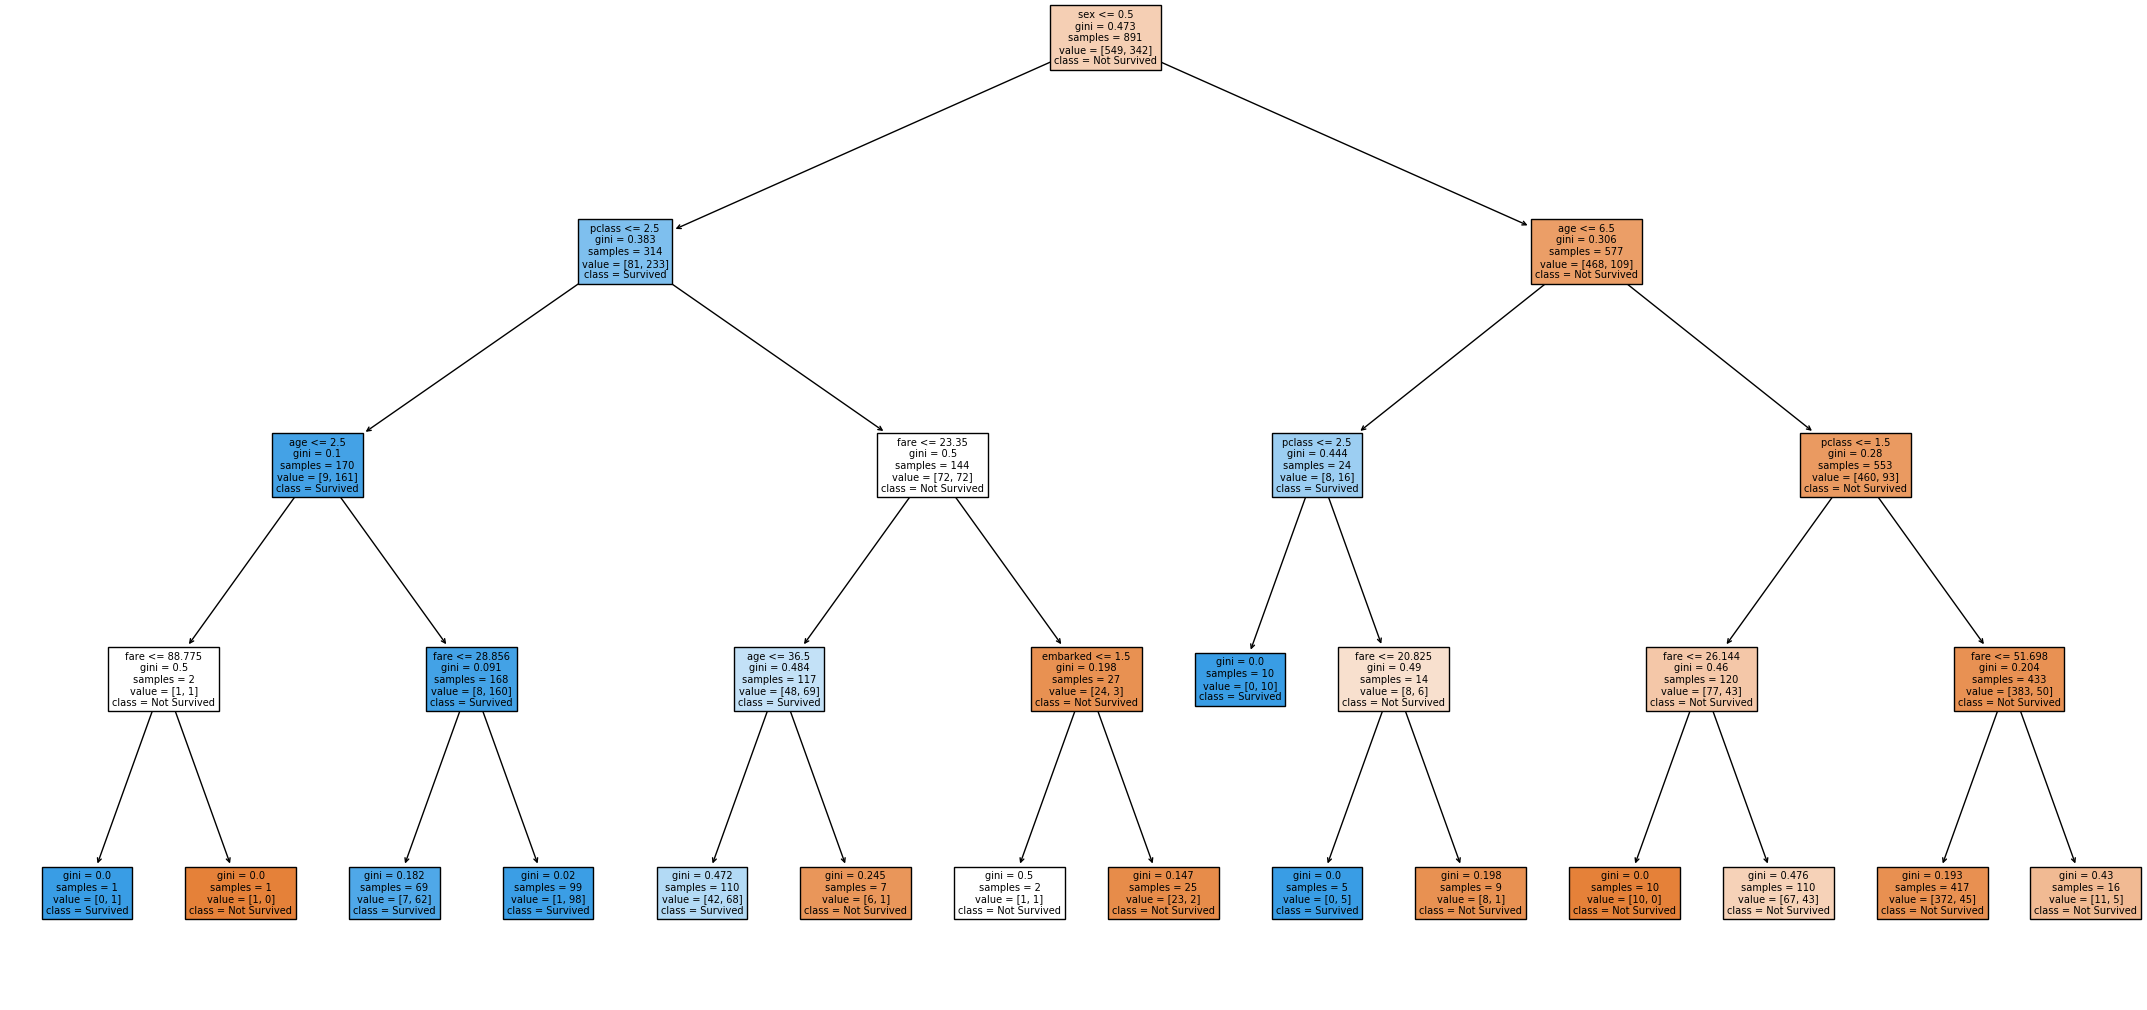

In [31]:
plt.figure(figsize=(20,10))
plot_tree(classifier,
          feature_names=x.columns,
          class_names=["Not Survived","Survived"],
          filled=True
)
plt.show()

In [32]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
pre=classifier.predict(new_passenger)
pre

array([0], dtype=int64)

In [33]:
if pre[0]==1:
    print("Passenger is likely to Survive")
else:
    print("Passengeris likely not to Survive")

Passengeris likely not to Survive
